In [1]:
from data_loader import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
import matplotlib.pyplot as plt

In [2]:
class ToxicJudge(object):
    def __init__(self, data_path):
        train = load_train_data(data_path + '/train.csv', is_df = False)
        test = load_test_data(data_path + '/test.csv', data_path + '/test_labels.csv', is_df = False)
        
        train_text, self.train_class = train[1], train[2]
        val_text, self.val_class = train[4], train[5]
        test_text, self.test_class = test[1], test[2]
        
        total = train_text + val_text
        self.word_generator = TfidfVectorizer(
            sublinear_tf=True,
            strip_accents='unicode',
            analyzer='word',
            token_pattern=r'\w{1,}',
            stop_words='english',
            ngram_range=(1, 1),
            max_features=1000)
        self.word_generator.fit(total)
        train_word_features = self.word_generator.transform(train_text)
        val_word_features = self.word_generator.transform(val_text)
        test_word_features = self.word_generator.transform(test_text)
        
        self.train_features = train_word_features
        self.val_features = val_word_features
        self.test_features = test_word_features
        
    def customInput(self, comment):
        return self.word_vectorizer.transform([comment])

In [3]:
model = ToxicJudge('data')

/Users/caojingchen/UCI/projects/data_mining/toxic/data_loader.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  return train_df['id'].tolist(), train_df['comment_text'].tolist(), train_df.iloc[:, 2:].as_matrix(),\
/Users/caojingchen/UCI/projects/data_mining/toxic/data_loader.py:16: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ), valid_df.iloc[:, 2:].as_matrix()
/Users/caojingchen/UCI/projects/data_mining/toxic/data_loader.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  return data_frame['id'].tolist(), data_frame['comment_text'].tolist(), label_frame.iloc[:, 1:].as_matrix()


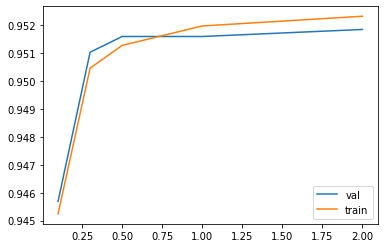

[0.9456862991334924, 0.9510234836117041, 0.9515885972623384, 0.9515885972623384, 0.9518397588848424]


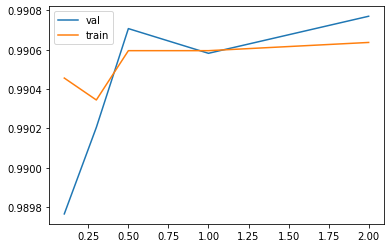

[0.9897651638829587, 0.9902046967223408, 0.990707019967349, 0.990581439156097, 0.990769810372975]


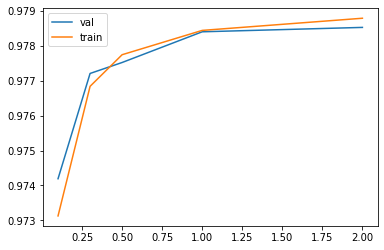

[0.9741931432877057, 0.9772070827577546, 0.9775210347858847, 0.978400100464649, 0.978525681275901]


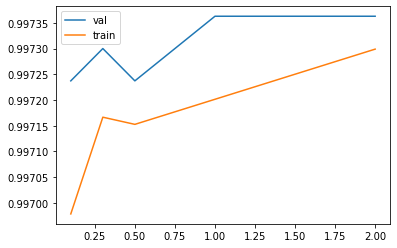

[0.9972372221524551, 0.9973000125580811, 0.9972372221524551, 0.9973628029637072, 0.9973628029637072]


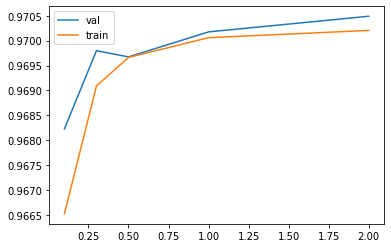

[0.9682280547532337, 0.9697978148938842, 0.9696722340826321, 0.9701745573276404, 0.9704885093557705]


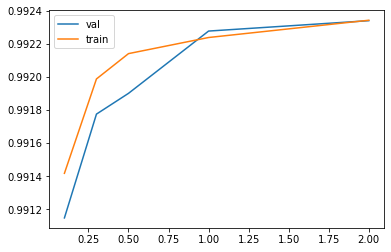

[0.9911465528067311, 0.9917744568629914, 0.9919000376742434, 0.9922767801079995, 0.9923395705136255]


In [13]:
def lr_process(self):
    predictList = []
    for col in range(6):
        train_target = model.train_class[:,col]
        val_target = model.val_class[:,col]
        test_target = model.test_class[:,col]
        valList = []
        trainList = []
        for C in [0.1,0.3,0.5,1,2]:
            lr = LogisticRegression(C=C, solver='sag')
            lr.fit(model.train_features, train_target)
            valList.append(lr.score(model.val_features, val_target))
            trainList.append(lr.score(model.train_features, train_target))
        plt.plot([0.1,0.3,0.5,1,2], valList, label='val')
        plt.plot([0.1,0.3,0.5,1,2], trainList, label='train')
        plt.legend()
        plt.show()
        print(valList)
        
#         predictList.append(lr.predict(model.test_features))
#     predictList = np.asarray(predictList).T
#     eq = 0
#     for idx in range(predictList.shape[0]):
#         if np.array_equal(predictList[idx,:], model.test_class[idx,:]):
#             eq += 1
#     return eq/predictList.shape[0]

lr_process(model)

In [14]:
def lr_process(self):
    predictList = []
    Clist = [.5,.3,.3,.1,.5,.8]
    for col in range(6):
        train_target = model.train_class[:,col]
        val_target = model.val_class[:,col]
        test_target = model.test_class[:,col]
        lr = LogisticRegression(C=Clist[col], solver='sag')
        lr.fit(model.train_features, train_target)
        predictList.append(lr.predict(model.test_features))
    predictList = np.asarray(predictList).T
    eq = 0
    for idx in range(predictList.shape[0]):
        if np.array_equal(predictList[idx,:], model.test_class[idx,:]):
            eq += 1
    return eq/predictList.shape[0]

lr_process(model)

0.8962612147925849

In [ ]:
def dt_process(model):
    t_score = []
    v_score = []
    for d in [10,50,90,130,170]:
        dt = DecisionTreeClassifier(max_depth=300, min_samples_split=10, min_samples_leaf=10, max_leaf_nodes=d)
        dt.fit(model.train_features, model.train_class)
        t_score.append(dt.score(model.train_features, model.train_class))
        v_score.append(dt.score(model.val_features, model.val_class))
    return t_score, v_score

ts, vs = dt_process(model)

In [ ]:
plt.plot([10,50,90,130,170], ts, label='train')
plt.plot([10,50,90,130,170], vs, label='validation')
plt.legend()
plt.show()

In [4]:
def rf_process(model):
    rf = RandomForestClassifier(n_estimators=10, max_depth=300, min_samples_split=10, min_samples_leaf=10, max_leaf_nodes=170)
    rf.fit(model.train_features, model.train_class)
    return rf.score(model.test_features, model.test_class)

rf_process(model)

0.8923223608115289